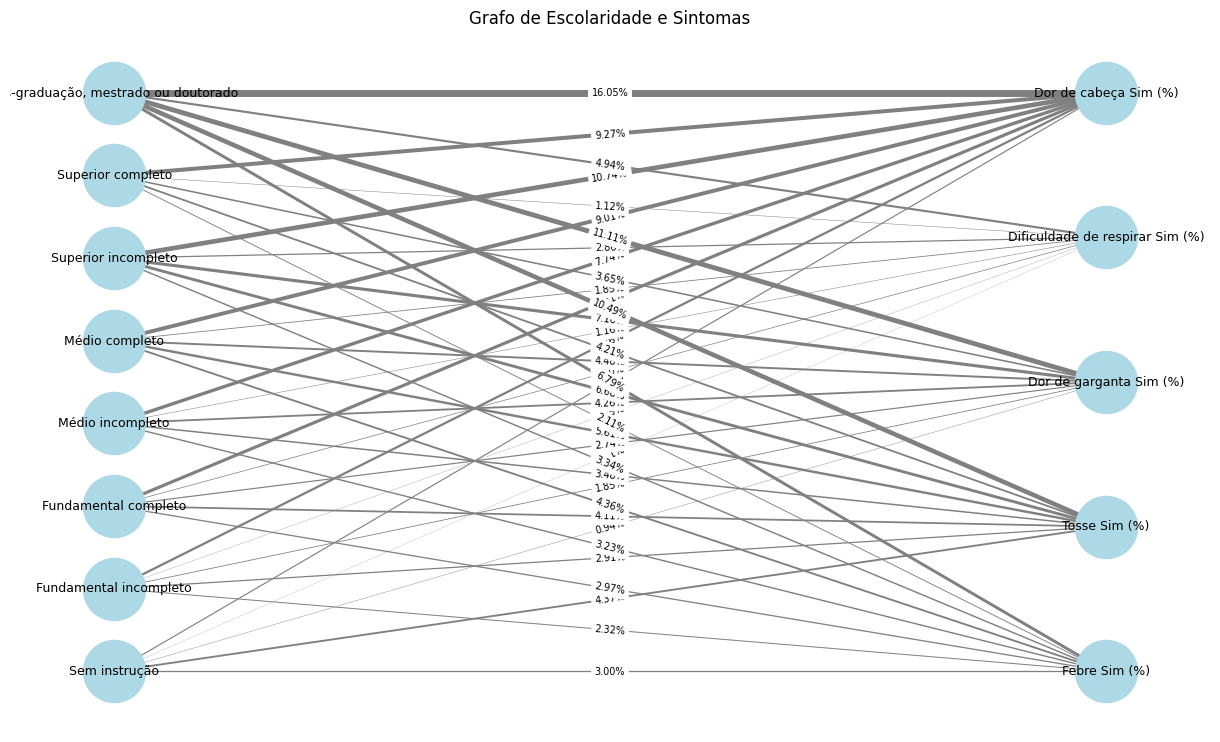

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#Grafo ContaminacaoXEscolaridade

# Criando o DataFrame
data = {
    "Escolaridade": [
        "Sem instrução", "Fundamental incompleto", "Fundamental completo", 
        "Médio incompleto", "Médio completo", "Superior incompleto", 
        "Superior completo", "Pós-graduação, mestrado ou doutorado"
    ],
    "Febre Sim (%)": [3.00, 2.32, 2.97, 3.23, 4.36, 3.34, 2.11, 6.79],
    "Tosse Sim (%)": [4.37, 2.91, 4.11, 3.48, 5.61, 6.68, 4.21, 10.49],
    "Dor de garganta Sim (%)": [0.94, 1.85, 2.74, 4.26, 4.48, 7.16, 3.65, 11.11],
    "Dificuldade de respirar Sim (%)": [0.51, 0.65, 1.60, 1.16, 1.85, 2.86, 1.12, 4.94],
    "Dor de cabeça Sim (%)": [2.66, 5.26, 7.31, 7.74, 9.01, 10.74, 9.27, 16.05]
}

df = pd.DataFrame(data)

# Criando o grafo
G = nx.Graph()

# Adicionando nós
escolaridades = df["Escolaridade"].tolist()
sintomas = df.columns[1:].tolist()
G.add_nodes_from(escolaridades, bipartite=0)
G.add_nodes_from(sintomas, bipartite=1)

# Adicionando arestas com pesos
for _, row in df.iterrows():
    escolaridade = row["Escolaridade"]
    for sintoma in sintomas:
        peso = row[sintoma]
        G.add_edge(escolaridade, sintoma, weight=peso)

# Posicionamento dos nós de forma uniforme
pos = {}
num_escolaridades = len(escolaridades)
num_sintomas = len(sintomas)

for i, esc in enumerate(escolaridades):
    pos[esc] = (0, i / (num_escolaridades - 1))  # Dispostos na vertical

for i, sint in enumerate(sintomas):
    pos[sint] = (1, i / (num_sintomas - 1))  # Dispostos na vertical

# Configuração das arestas
edges = G.edges(data=True)
weights = [edata["weight"] / max(df[sintomas].max()) * 5 for _, _, edata in edges]  # Normalizando espessura

# Desenhando o grafo
plt.figure(figsize=(12, 7))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", width=weights, font_size=9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}, font_size=7)
plt.title("Grafo de Escolaridade e Sintomas")
plt.show()


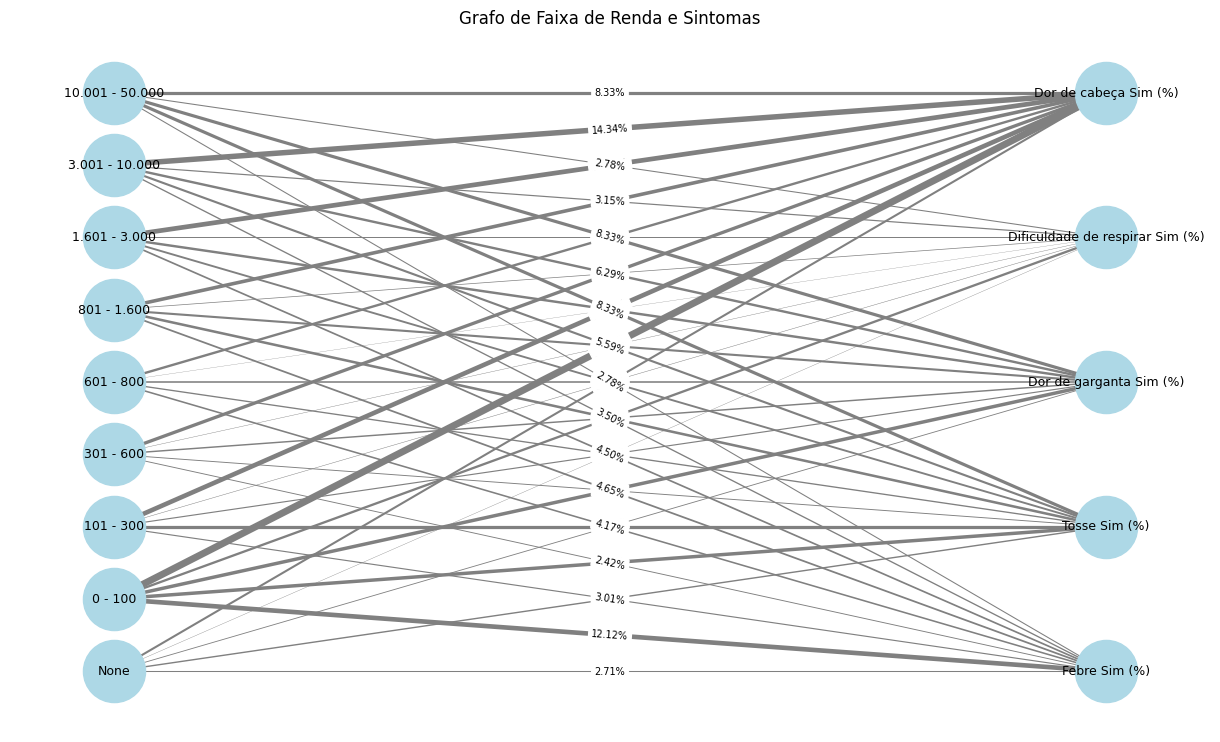

In [3]:
#ContaminacaoXrenda

# Criando o DataFrame
data = {
    "Faixa de renda": [
        "None", "0 - 100", "101 - 300", "301 - 600", "601 - 800", 
        "801 - 1.600", "1.601 - 3.000", "3.001 - 10.000", "10.001 - 50.000"
    ],
    "Febre Sim (%)": [2.71, 12.12, 3.01, 2.42, 4.17, 4.65, 4.50, 3.50, 2.78],
    "Tosse Sim (%)": [3.66, 9.09, 8.43, 2.42, 3.47, 6.70, 4.98, 5.59, 8.33],
    "Dor de garganta Sim (%)": [2.23, 9.09, 3.01, 3.81, 4.17, 5.52, 6.40, 6.29, 8.33],
    "Dificuldade de respirar Sim (%)": [0.90, 6.06, 1.20, 1.04, 0.69, 1.81, 2.61, 3.15, 2.78],
    "Dor de cabeça Sim (%)": [5.42, 18.18, 12.05, 8.65, 6.25, 9.38, 12.32, 14.34, 8.33]
}

df = pd.DataFrame(data)

# Criando o grafo
G = nx.Graph()

# Adicionando nós
rendas = df["Faixa de renda"].tolist()
sintomas = df.columns[1:].tolist()
G.add_nodes_from(rendas, bipartite=0)
G.add_nodes_from(sintomas, bipartite=1)

# Adicionando arestas com pesos
for _, row in df.iterrows():
    renda = row["Faixa de renda"]
    for sintoma in sintomas:
        peso = row[sintoma]
        G.add_edge(renda, sintoma, weight=peso)

# Posicionamento dos nós de forma uniforme
pos = {}
num_rendas = len(rendas)
num_sintomas = len(sintomas)

for i, renda in enumerate(rendas):
    pos[renda] = (0, i / (num_rendas - 1))  # Dispostos na vertical

for i, sint in enumerate(sintomas):
    pos[sint] = (1, i / (num_sintomas - 1))  # Dispostos na vertical

# Configuração das arestas
edges = G.edges(data=True)
weights = [edata["weight"] / max(df[sintomas].max()) * 5 for _, _, edata in edges]  # Normalizando espessura

# Desenhando o grafo
plt.figure(figsize=(12, 7))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", width=weights, font_size=9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}, font_size=7)
plt.title("Grafo de Faixa de Renda e Sintomas")
plt.show()